In [2]:
'''
This code was used to check PERMANOVA results.
However, I later realized the python version does not provide sumofsquares and R^2 values.
So best to use Stephen's PERMANOVA R code, which provides full results.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.stats import wilcoxon

In [47]:
relabund_df = pd.read_excel('relabunds.xlsx')
print(relabund_df)
relabund_df = relabund_df.replace('AI', 'CI')
relabund_df = relabund_df.replace('MC', 'HM')
relabund_df = relabund_df.replace('FC', 'HI')
relabund_df = relabund_df.sort_values(by=['newName', 'regionYear', 'type', 'FlowCamID']).reset_index(drop=True)
relabund_df = relabund_df.replace({'Gulf 2020': 'Gulf', 'Pac 21': 'Pacific' })
regionYears = relabund_df['regionYear'].unique()
types = relabund_df['type'].unique()
relabund_df

            newName                        FlowCamID regionYear type  \
0      Acartia spp.      21_10_05_NL_S1_Z17_0752_250    NL 2021   AI   
1      Acartia spp.      21_10_05_NL_S1_Z17_0752_250    NL 2021   FC   
2      Acartia spp.      21_10_05_NL_S1_Z17_0752_250    NL 2021   MC   
3      Acartia spp.      21_10_05_NL_S1_Z17_1406_250    NL 2021   AI   
4      Acartia spp.      21_10_05_NL_S1_Z17_1406_250    NL 2021   FC   
...             ...                              ...        ...  ...   
4045  Tortanus spp.  AMMP_PA_S04W20_20210609LT_250um     Pac 21   FC   
4046  Tortanus spp.  AMMP_PA_S04W20_20210609LT_250um     Pac 21   MC   
4047  Tortanus spp.  AMMP_PA_S04W20_20210610LT_250um     Pac 21   AI   
4048  Tortanus spp.  AMMP_PA_S04W20_20210610LT_250um     Pac 21   FC   
4049  Tortanus spp.  AMMP_PA_S04W20_20210610LT_250um     Pac 21   MC   

           abund     sumabund  relabund  
0     278.000000   788.000000  0.352792  
1     295.389927   737.310046  0.400632  
2     840

,newName,FlowCamID,regionYear,type,abund,sumabund,relabund
0,Acartia spp.,AMMP_Gulf_StPeters_1_20200903HT_250UM,Gulf,CI,56.000000,3847.000000,0.014557
1,Acartia spp.,AMMP_Gulf_StPeters_1_20200903LT_250UM,Gulf,CI,943.000000,3268.000000,0.288556
2,Acartia spp.,AMMP_Gulf_StPeters_1_20200904HT_250UM,Gulf,CI,99.000000,7495.000000,0.013209
3,Acartia spp.,AMMP_Gulf_StPeters_2B_20200903_250UM,Gulf,CI,1125.000000,2895.000000,0.388601
4,Acartia spp.,AMMP_Gulf_StPeters_2_20200903HT_250UM,Gulf,CI,1207.000000,4104.000000,0.294103
...,...,...,...,...,...,...,...
4045,Tortanus spp.,AMMP_PA_S04W15_20210609LT_250um,Pacific,HM,2.591720,3992.867992,0.000649
4046,Tortanus spp.,AMMP_PA_S04W15_20210610LT_250um,Pacific,HM,20.081536,4837.139957,0.004152
4047,Tortanus spp.,AMMP_PA_S04W20_20210609HT_250um,Pacific,HM,7.060098,2971.197950,0.002376
4048,Tortanus spp.,AMMP_PA_S04W20_20210609LT_250um,Pacific,HM,3.662212,5824.748921,0.000629


In [49]:

for regionYear in regionYears:
    print('-------------------', regionYear, '----------------------------------------------------------------')
    # mean_disses[regionYear] = []
    sampleNames = relabund_df[relabund_df['regionYear'] == regionYear]['FlowCamID'].unique()
    # simper_results[regionYear] = []
    for sampleName in sampleNames:
        print('--------###--------', sampleName, '---------###--------')
        type_dfs = []
        data_df = pd.DataFrame()
        relabunds = []
        print(types)
        for t, type in enumerate(types):
            test_df = relabund_df[(relabund_df['regionYear'] == regionYear) & (relabund_df['FlowCamID'] == sampleName)]
            test_df = test_df[test_df['type'] == type]
            data = test_df.groupby("newName")["relabund"].apply(np.mean).reset_index()
            data['type'] = type
            newNames = data['newName'].to_numpy()
            if t == 0:
                data_df['newName'] = newNames
            data_df[type] = data['relabund'].to_numpy()
            relabunds.append(data['relabund'].to_numpy())
        # print("relabunds: ", relabunds)
        pivoted = pd.DataFrame(relabunds, columns=newNames)
        print("pivoted: ", pivoted)
        break
    break



------------------- Gulf ----------------------------------------------------------------
--------###-------- AMMP_Gulf_StPeters_1_20200903HT_250UM ---------###--------
['CI' 'HI' 'HM']
pivoted:     Acartia spp.  Ascidiacea (larvae)  Bivalvia (larvae)  Bryozoa (larvae)  \
0      0.014557              0.00052           0.551859          0.013257   
1      0.075333              0.00000           0.552116          0.020798   
2      0.038549              0.00000           0.643991          0.024943   

   Calanoida (ci-ciii)  Centropages spp.  Chaetognatha  Cirripedia (larvae)  \
0             0.021575          0.035612      0.000000             0.002080   
1             0.000000          0.004384      0.000967             0.000242   
2             0.040816          0.000000      0.000000             0.000000   

   Cnidaria (larvae)  Copepoda (nauplii)  ...  Oikopleura spp.  Oithona spp.  \
0           0.000000            0.018456  ...         0.000000      0.140629   
1           0.0002

In [30]:
"""
Parameters:
    data (pd.DataFrame): Rows are samples, columns are species abundances.
    groups (list or pd.Series): Grouping variable for the samples.
    metric (str): Distance metric (e.g., 'braycurtis', 'euclidean').
    top_n (int): Number of top contributors to return.

Returns:
    pd.DataFrame: Species contributions to group dissimilarities.
"""
metric='braycurtis'
# Compute the dissimilarity matrix
# print("type of data: ")
data = pivoted
data = data.loc[:, (data != 0).any(axis=0)]
print("data: ", data)
print(types)
dist_matrix = squareform(pdist(data, metric=metric))
print("dist matrix:")
print(dist_matrix)

data:     Acartia spp.  Ascidiacea (larvae)  Bivalvia (larvae)  Bryozoa (larvae)  \
0      0.014557              0.00052           0.551859          0.013257   
1      0.075333              0.00000           0.552116          0.020798   
2      0.038549              0.00000           0.643991          0.024943   

   Calanoida (ci-ciii)  Centropages spp.  Chaetognatha  Cirripedia (larvae)  \
0             0.021575          0.035612      0.000000             0.002080   
1             0.000000          0.004384      0.000967             0.000242   
2             0.040816          0.000000      0.000000             0.000000   

   Cnidaria (larvae)  Copepoda (nauplii)  ...  Monstrillidae  \
0           0.000000            0.018456  ...       0.000000   
1           0.000242            0.004353  ...       0.000242   
2           0.000000            0.006803  ...       0.000000   

   Obelia spp. (medusa)  Oikopleura spp.  Oithona spp.  Paracalanus spp.  \
0              0.001040         0.

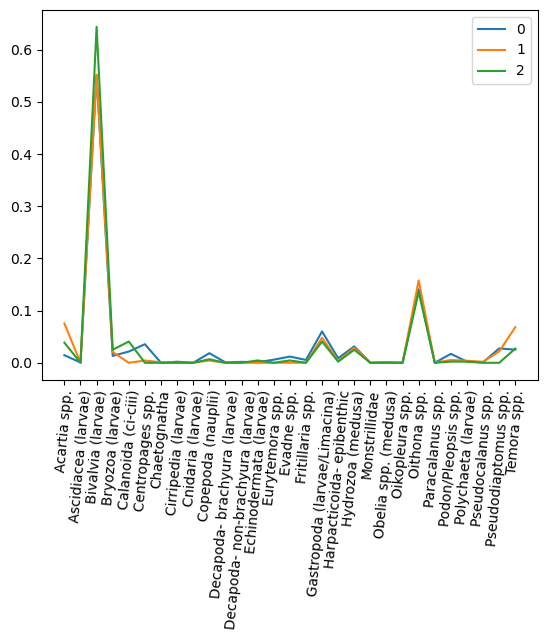

In [31]:
plt.plot(data.loc[0], label=0)
plt.plot(data.loc[1], label=1)
plt.plot(data.loc[2], label=2)
plt.xticks(rotation=85)
plt.legend()
plt.show()
plt.close()

In [43]:
import pandas as pd
import numpy as np
from skbio.stats.distance import permanova
from skbio.stats.distance import DistanceMatrix
from skbio.diversity import beta_diversity
from sklearn.preprocessing import StandardScaler

# Example: relative abundances for four regions (samples by taxa)
data = {
    'Region': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'D', 'D', 'D'],
    'Taxon1': [0.2, 0.3, 0.25, 0.1, 0.2, 0.3, 0.4, 0.35, 0.3, 0.15, 0.1, 0.05],
    'Taxon2': [0.3, 0.2, 0.25, 0.3, 0.25, 0.2, 0.2, 0.3, 0.25, 0.35, 0.4, 0.45],
    'Taxon3': [0.5, 0.5, 0.45, 0.6, 0.55, 0.5, 0.4, 0.35, 0.45, 0.5, 0.5, 0.5],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Extract the relative abundance data and the region labels
abundance_data = df.drop(columns='Region')
regions = df['Region']

# Optional: Normalize or standardize data (if needed)
# scaler = StandardScaler()
# abundance_data_scaled = scaler.fit_transform(abundance_data)
abundance_data_scaled = abundance_data

print(abundance_data_scaled)
# Compute the Bray-Curtis distance matrix using beta_diversity
distance_matrix = beta_diversity('braycurtis', abundance_data_scaled)

# Convert the distance matrix to the correct format for PERMANOVA
distance_matrix = DistanceMatrix(distance_matrix)
print(distance_matrix)
# Perform PERMANOVA
permanova_results = permanova(distance_matrix, regions)

# Print the results
print(permanova_results)


    Taxon1  Taxon2  Taxon3
0     0.20    0.30    0.50
1     0.30    0.20    0.50
2     0.25    0.25    0.45
3     0.10    0.30    0.60
4     0.20    0.25    0.55
5     0.30    0.20    0.50
6     0.40    0.20    0.40
7     0.35    0.30    0.35
8     0.30    0.25    0.45
9     0.15    0.35    0.50
10    0.10    0.40    0.50
11    0.05    0.45    0.50
12x12 distance matrix
IDs:
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11
Data:
[[0.         0.1        0.07692308 0.1        0.05       0.1
  0.2        0.15       0.1        0.05       0.1        0.15      ]
 [0.1        0.         0.07692308 0.2        0.1        0.
  0.1        0.15       0.05       0.15       0.2        0.25      ]
 [0.07692308 0.07692308 0.         0.17948718 0.07692308 0.07692308
  0.12820513 0.12820513 0.02564103 0.12820513 0.17948718 0.23076923]
 [0.1        0.2        0.17948718 0.         0.1        0.2
  0.3        0.25       0.2        0.1        0.1        0.15      ]
 [0.05       0.1        0.07692308 0.1        0.     

In [50]:
df['Taxon1'].sum()

2.6999999999999997

In [48]:
relabund_df = relabund_df.drop(columns=['abund', 'sumabund'])
relabund_df

,newName,FlowCamID,regionYear,type,relabund
0,Acartia spp.,AMMP_Gulf_StPeters_1_20200903HT_250UM,Gulf,CI,0.014557
1,Acartia spp.,AMMP_Gulf_StPeters_1_20200903LT_250UM,Gulf,CI,0.288556
2,Acartia spp.,AMMP_Gulf_StPeters_1_20200904HT_250UM,Gulf,CI,0.013209
3,Acartia spp.,AMMP_Gulf_StPeters_2B_20200903_250UM,Gulf,CI,0.388601
4,Acartia spp.,AMMP_Gulf_StPeters_2_20200903HT_250UM,Gulf,CI,0.294103
...,...,...,...,...,...
4045,Tortanus spp.,AMMP_PA_S04W15_20210609LT_250um,Pacific,HM,0.000649
4046,Tortanus spp.,AMMP_PA_S04W15_20210610LT_250um,Pacific,HM,0.004152
4047,Tortanus spp.,AMMP_PA_S04W20_20210609HT_250um,Pacific,HM,0.002376
4048,Tortanus spp.,AMMP_PA_S04W20_20210609LT_250um,Pacific,HM,0.000629


In [64]:

def get_relabund_row(df, regionYear, sample, type):
    df = df[df['regionYear'] == regionYear]
    df = df[df['FlowCamID'] == sample]
    df = df[df['type'] == type]
    df = df.sort_values('newName')
    relabunds = df['relabund'].to_numpy()
    newNames = df['newName'].to_numpy()
    return relabunds, newNames
relabund_row, newNames = get_relabund_row(relabund_df, 'Gulf', sample = 'AMMP_Gulf_StPeters_1_20200903HT_250UM', type='CI')
relabund_row

array([1.45567975e-02, 5.19885625e-04, 5.51858591e-01, 1.32570834e-02,
       2.15752534e-02, 3.56121653e-02, 0.00000000e+00, 2.07954250e-03,
       0.00000000e+00, 1.84559397e-02, 7.79828438e-04, 1.81959969e-03,
       1.03977125e-03, 5.97868469e-03, 1.19573694e-02, 5.45879906e-03,
       6.00467897e-02, 8.83805563e-03, 3.14530803e-02, 0.00000000e+00,
       0.00000000e+00, 1.03977125e-03, 0.00000000e+00, 1.40629062e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.71562256e-02,
       2.07954250e-03, 1.03977125e-03, 2.75539381e-02, 2.52144528e-02])

In [76]:
regionYear = 'Gulf'
samples = relabund_df[relabund_df['regionYear'] == regionYear]['FlowCamID'].unique()
compared_relabunds = []
compared_types = []
compared_newNames = []
compared_samples = []
for sample in samples:
    for type in types:
        # if type =='CI':
        #     continue
        relabund_row, newNames = get_relabund_row(relabund_df, 'Gulf', sample=sample, type=type)
        compared_relabunds.append(relabund_row)
        compared_types.append(type)
        compared_newNames.append(newNames)
        compared_samples.append(sample)
print(np.shape(compared_relabunds))
print(np.shape(compared_types))
print(np.shape(compared_newNames))

(30, 32)
(30,)
(30, 32)


In [77]:
data = pd.DataFrame(compared_relabunds, columns=compared_newNames[0])
# Compute the Bray-Curtis distance matrix using beta_diversity
distance_matrix = beta_diversity('braycurtis', data)

# Convert the distance matrix to the correct format for PERMANOVA
distance_matrix = DistanceMatrix(distance_matrix)
# print(distance_matrix)
# Perform PERMANOVA
permanova_results = permanova(distance_matrix, compared_samples)

# Print the results
print(permanova_results)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      30
number of groups                 10
test statistic             4.983986
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object


In [79]:
import pandas as pd
import numpy as np
from skbio.stats.distance import permanova
from skbio.stats.distance import DistanceMatrix
from skbio.diversity import beta_diversity
from sklearn.preprocessing import StandardScaler

# Example: relative abundances for four regions (samples by taxa)
data = {
    'Region': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'D', 'D', 'D'],
    'Taxon1': [0.2, 0.3, 0.25, 0.1, 0.2, 0.3, 0.4, 0.35, 0.3, 0.15, 0.1, 0.05],
    'Taxon2': [0.3, 0.2, 0.25, 0.3, 0.25, 0.2, 0.2, 0.3, 0.25, 0.35, 0.4, 0.45],
    'Taxon3': [0.5, 0.5, 0.45, 0.6, 0.55, 0.5, 0.4, 0.35, 0.45, 0.5, 0.5, 0.5],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Extract the relative abundance data and the region labels
abundance_data = df.drop(columns='Region')
regions = df['Region']

# Optional: Normalize or standardize data (if needed)
# scaler = StandardScaler()
# abundance_data_scaled = scaler.fit_transform(abundance_data)

# Compute the Bray-Curtis distance matrix using beta_diversity
distance_matrix = beta_diversity('braycurtis', abundance_data)

# Convert the distance matrix to the correct format for PERMANOVA
distance_matrix = DistanceMatrix(distance_matrix)

# Perform PERMANOVA
permanova_results = permanova(distance_matrix, regions)

# Extract Sums of Squares for the factor and residuals
SS_factor = permanova_results['SumsOfSqs'][0]  # Sums of squares for the factor (Region)
SS_total = SS_factor + permanova_results['SumsOfSqs'][1]  # Total sums of squares (Factor + Residuals)

# Calculate R²
R_squared = SS_factor / SS_total

# Print the R² value
print(f"R² (explained variance) = {R_squared:.4f}")


KeyError: 'SumsOfSqs'